**derived from**
https://keras.io/api/applications/
https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/

**mount Google Drive to load image**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**load required libraries**

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

**load model and data, get data ready for processing**

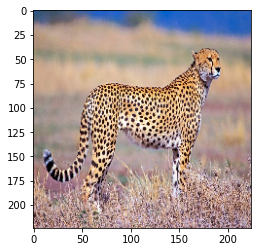

In [7]:
# load the model
model = VGG16(weights='imagenet')

# load an image from file
img = image.load_img('/content/gdrive/MyDrive/Colab Notebooks/cheetah.jpg', target_size=(224, 224))
#img = image.load_img('/content/gdrive/MyDrive/Colab Notebooks/ostrich.jpg', target_size=(224, 224))
#img = image.load_img('/content/gdrive/MyDrive/Colab Notebooks/elephant.jpg', target_size=(224, 224))
#img = image.load_img('/content/gdrive/MyDrive/Colab Notebooks/ziraffe.jpg', target_size=(224, 224))

# convert the image pixels to a numpy array
x = image.img_to_array(img)

# reshape data for the model
x = np.expand_dims(x, axis=0)

# prepare the image for the VGG model
x = preprocess_input(x)
plt.imshow(img)
plt.show()

**Make prediction with the model**

In [8]:
# predict the probability across all output classes
preds = model.predict(x)

# convert the probabilities to class labels
label = decode_predictions(preds)

**Show prediction label**

In [9]:
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

cheetah (99.96%)


**Show top-3 prediction likelihoods with probability**

In [10]:
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02130308', 'cheetah', 0.9996439), ('n02128385', 'leopard', 0.00035230172), ('n02128925', 'jaguar', 1.2058063e-06)]
